In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.7 MB/s eta 0:00:00
   ━━━━

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pycaret.clustering import setup, create_model, assign_model, evaluate_model
from sklearn.metrics import silhouette_score

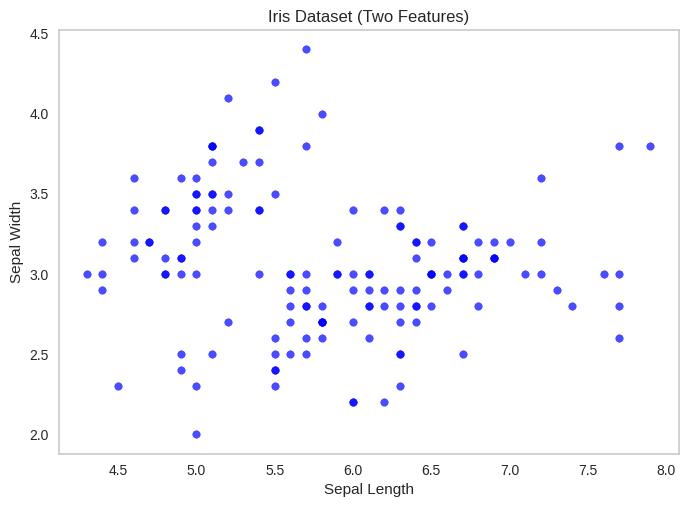

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df = df[['sepal length (cm)', 'sepal width (cm)']]

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='blue', marker='o', s=30, alpha=0.7)
plt.title('Iris Dataset (Two Features)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.grid()
plt.show()

In [3]:
clustering_setup = setup(data=df, normalize=True, session_id=42)

,Description,Value
0,Session id,42
1,Original data shape,"(150, 2)"
2,Transformed data shape,"(150, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [4]:
dbscan_model = create_model('dbscan')
dbscan_results = assign_model(dbscan_model)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3920,5.3858,2.9615,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

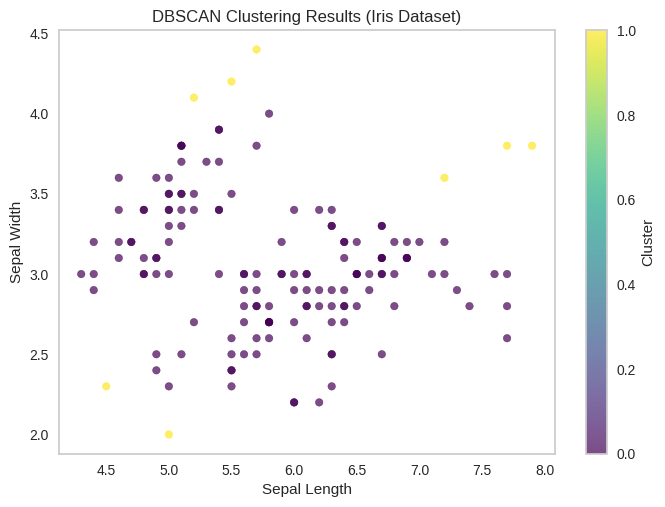

In [5]:
dbscan_results['Cluster'] = dbscan_results['Cluster'].str.extract('(\d+)').astype(float)


plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=dbscan_results['Cluster'], cmap='viridis', marker='o', s=30, alpha=0.7)
plt.title('DBSCAN Clustering Results (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [6]:

labels = dbscan_results['Cluster'].values
valid_labels = labels[labels != -1]
valid_points = df[labels != -1]
if len(set(valid_labels)) > 1:
    silhouette_avg = silhouette_score(valid_points, valid_labels)
    print(f"Silhouette Score (excluding noise): {silhouette_avg}")
else:
    print("Not enough clusters for silhouette score.")

evaluate_model(dbscan_model)

Silhouette Score (excluding noise): 0.331967175240284


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…